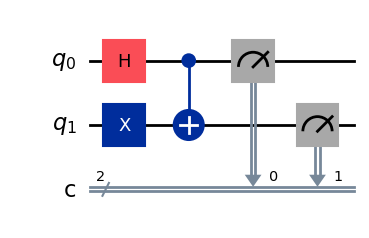

In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)

qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))


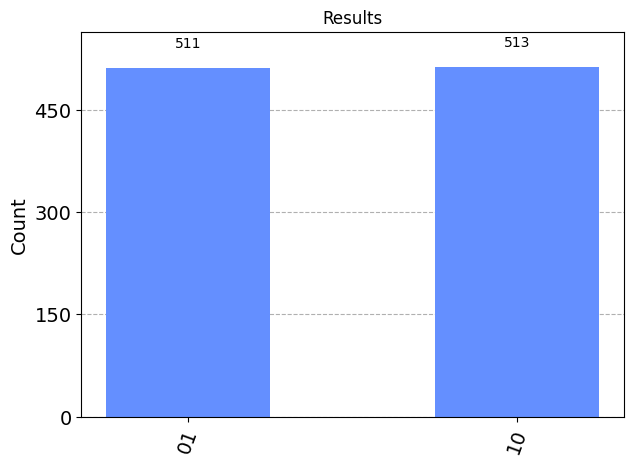

In [2]:
simulator = BasicAer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1024, seed_simulator=42)
result = job.result()

counts = result.get_counts()

display(plot_histogram(counts, title="Results"))


In [3]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account("2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a",overwrite=True)
IBMProvider.saved_accounts()

# pode ser necessário definir o argumento "instance"
# ver na IBM quantum platform >> account >> manage account >> profile overvies
provider = IBMProvider()



In [4]:
provider.backends()

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>]

In [5]:
quantum_devices_available = provider.backends(simulator=False, operational=True)

quantum_devices_available

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [6]:
backend = quantum_devices_available[0]

backend

<IBMBackend('ibm_brisbane')>

In [7]:
backend.name

'ibm_brisbane'

In [8]:
backend.status()

In [9]:
backend.num_qubits

127

In [10]:
small_devices = provider.backends(simulator=False, operational=True, filters=lambda b: b.num_qubits < 30)

small_devices


[]

In [ ]:
from qiskit.visualization import plot_gate_map

for backend in small_devices:
    
    print(f"\nBackend: {backend.name}")
    
    print(f"\nCoupling map:\n\n{backend.configuration().coupling_map}\n")

    display(plot_gate_map(backend))
    
    display(backend.status())
    
    print("="*50)

In [21]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account("2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a",overwrite=True)
IBMProvider.saved_accounts()

provider = IBMProvider()

# Substitua 'nome_do_backend' pelo nome do backend que você deseja usar
backend_escolhido = provider.get_backend('ibm_osaka')

# Verifique o status do backend escolhido
status = backend_escolhido.status()
print(status)




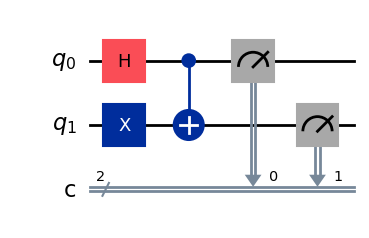

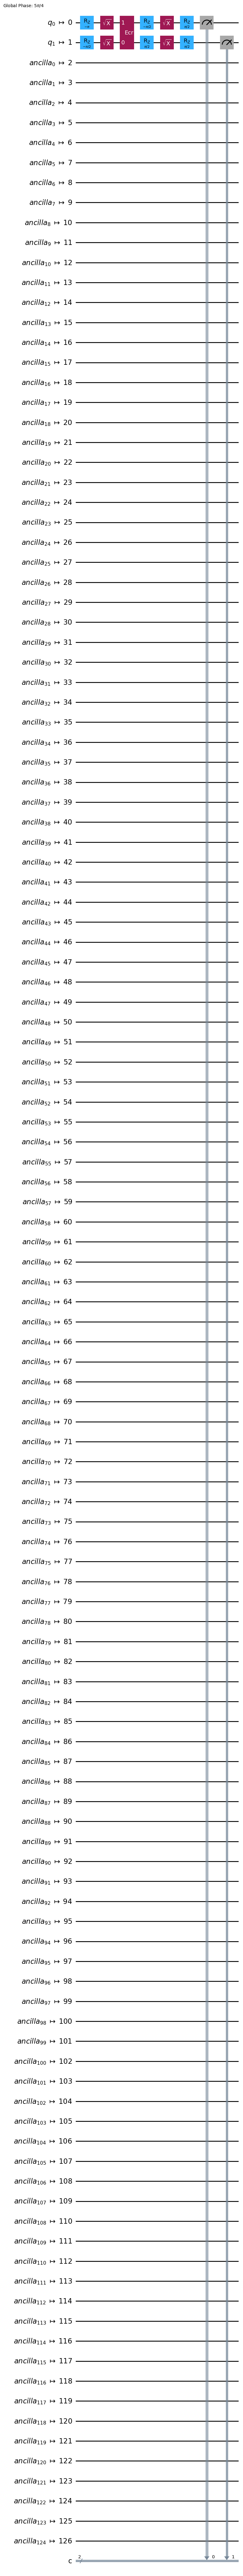

In [15]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 2)

qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================

from qiskit.compiler import transpile

mapped_circuit = transpile(qc, backend=backend)

display(mapped_circuit.draw("mpl", style="iqp"))


In [16]:
backend.configuration().basis_gates

['ecr', 'id', 'rz', 'sx', 'x']

In [17]:
print(mapped_circuit.depth())
print(mapped_circuit.count_ops())

7
OrderedDict([('rz', 6), ('sx', 4), ('measure', 2), ('ecr', 1)])


In [18]:
print(qc.depth())
print(qc.count_ops())

3
OrderedDict([('measure', 2), ('x', 1), ('h', 1), ('cx', 1)])


In [22]:
#Executando o job
job = backend_escolhido.run(mapped_circuit, shots=1024, job_tags=["bell"])



In [20]:


job.status()



<JobStatus.QUEUED: 'job is queued'>

In [ ]:
job.job_id()

'cpe34ch2zy6g008p3tgg'

In [ ]:
for ran_job in provider.backend.jobs(limit=5):
    
    print(f'{ran_job.job_id()} - date: {ran_job.creation_date().date()} - tags: {ran_job.tags()} - status: {ran_job.status()} ')

cmfajt4nktricigkeue0 - date: 2024-01-10 - tags: ['bell'] - status: JobStatus.DONE 
cmfaiv8hu2povi5t4qp0 - date: 2024-01-10 - tags: ['bell'] - status: JobStatus.DONE 
cpfahpp2zy6g008p6wdg - date: 2024-01-10 - tags: ['bell'] - status: JobStatus.DONE 
cpf8pbhmbjng00866hcg - date: 2024-01-10 - tags: ['bell'] - status: JobStatus.DONE 
cpe34ch2zy6g008p3tgg - date: 2024-01-08 - tags: ['bell'] - status: JobStatus.DONE 


In [ ]:
#Aqui ele vai rodar um job que ele já fez antes
retrieved_job = provider.backend.retrieve_job("cpfahpp2zy6g008p6wdg")

retrieved_job



<IBMCircuitJob('cpfahpp2zy6g008p6wdg')>

In [ ]:
retrieved_job.backend()

<IBMBackend('ibm_kyoto')>

In [ ]:
retrieved_job.creation_date()

datetime.datetime(2024, 1, 10, 11, 25, 30, 357000, tzinfo=tzlocal())

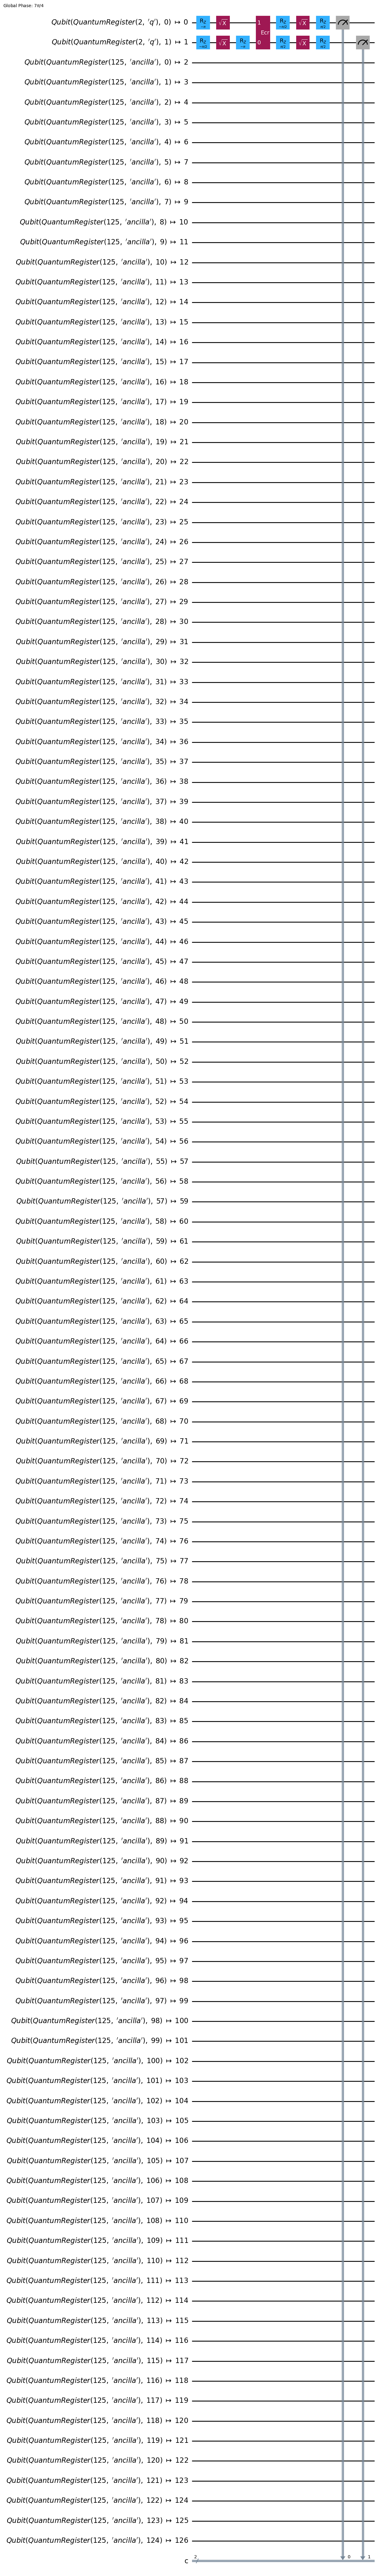

In [ ]:
retrieved_job.circuits()[0].draw("mpl", style="iqp")

In [ ]:
retrieved_job.result()

Result(backend_name='ibm_kyoto', backend_version='0.0.0', qobj_id='Unknown', job_id='circuit-runner_cmfb68sc8asb4voj310g_a6ee_0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 430, '0x1': 71, '0x2': 42, '0x3': 481}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q', 60], ['q',

In [ ]:
retrieved_job.result().get_counts()

{'00': 430, '01': 71, '10': 42, '11': 481}

In [ ]:
#Ele vai comparar os dois agora
job = provider.backend.retrieve_job("cpfahpp2zy6g008p6wdg")

job.status()

<JobStatus.DONE: 'job has successfully run'>

In [ ]:
counts_hardware = job.result().get_counts()

counts_hardware

{'00': 430, '01': 71, '10': 42, '11': 481}

In [ ]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram


job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

counts_simulator


{'00': 511, '11': 513}

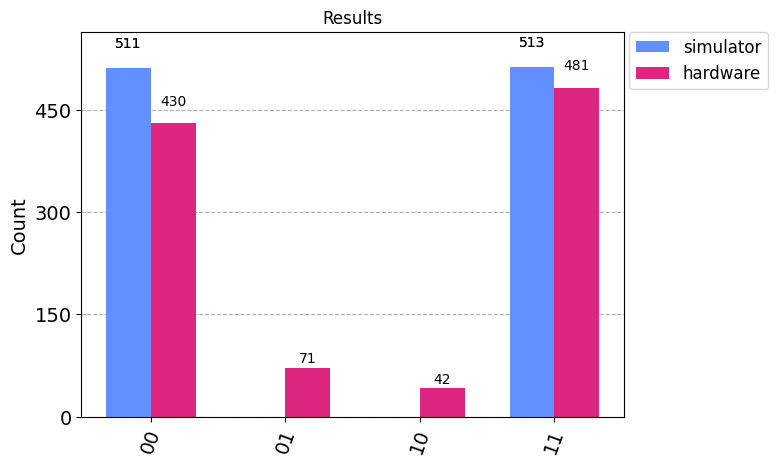

In [ ]:
legend=["simulator", "hardware"]

plot_histogram([counts_simulator, counts_hardware], title="Results", legend=legend)

In [ ]:

from qiskit.providers.fake_provider import FakeCairoV2

fake_backend = FakeCairoV2()

fake_backend



In [ ]:
from qiskit_aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(fake_backend)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'id', 'measure', 'sx', 'x', 'reset']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)

In [ ]:
job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

counts_simulator_noisy


{'01': 20, '10': 14, '00': 511, '11': 479}

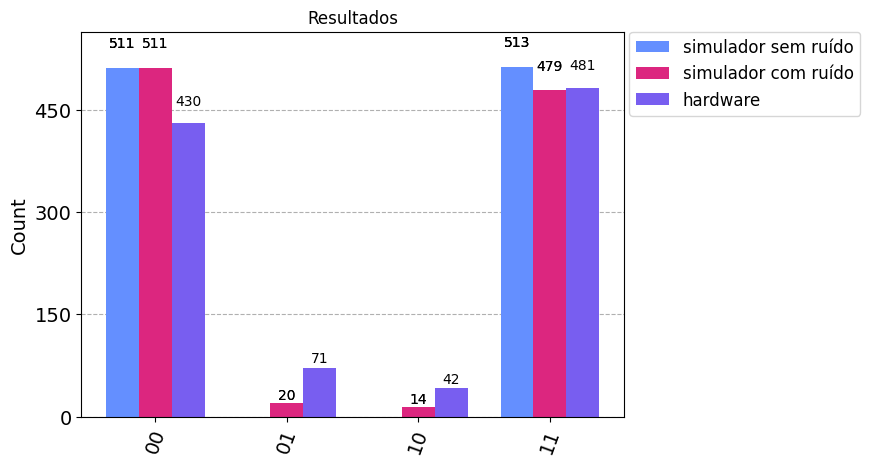

In [ ]:
legend=["simulador sem ruído", "simulador com ruído", "hardware"]

plot_histogram([counts_simulator, counts_simulator_noisy, counts_hardware], title="Resultados", legend=legend)


In [ ]:
fake_backend._props_dict["last_update_date"]

datetime.datetime(2021, 12, 9, 12, 24, 17, tzinfo=tzoffset(None, -18000))

In [ ]:
backend_least_busy

<IBMBackend('ibm_kyoto')>

In [ ]:
from qiskit.providers.aer import AerSimulator

fake_backend = AerSimulator.from_backend(backend_least_busy)



In [ ]:
fake_backend._properties.qubits

[[Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902637, tzinfo=datetime.timezone.utc), readout_error, , 0.1491),
  Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902638, tzinfo=datetime.timezone.utc), readout_length, s, 1.4e-06)],
 [Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902639, tzinfo=datetime.timezone.utc), readout_error, , 0.07320000000000004),
  Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902641, tzinfo=datetime.timezone.utc), readout_length, s, 1.4e-06)],
 [Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902642, tzinfo=datetime.timezone.utc), readout_error, , 0.0037000000000000366),
  Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902643, tzinfo=datetime.timezone.utc), readout_length, s, 1.4e-06)],
 [Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902644, tzinfo=datetime.timezone.utc), readout_error, , 0.08729999999999993),
  Nduv(datetime.datetime(2024, 1, 11, 12, 58, 15, 902644, tzinfo=datetime.timezone.utc), readout_length, s, 1.4e-06)],
 [Nduv(datetime.datetim

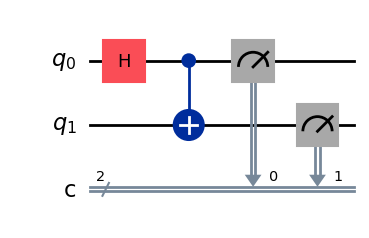

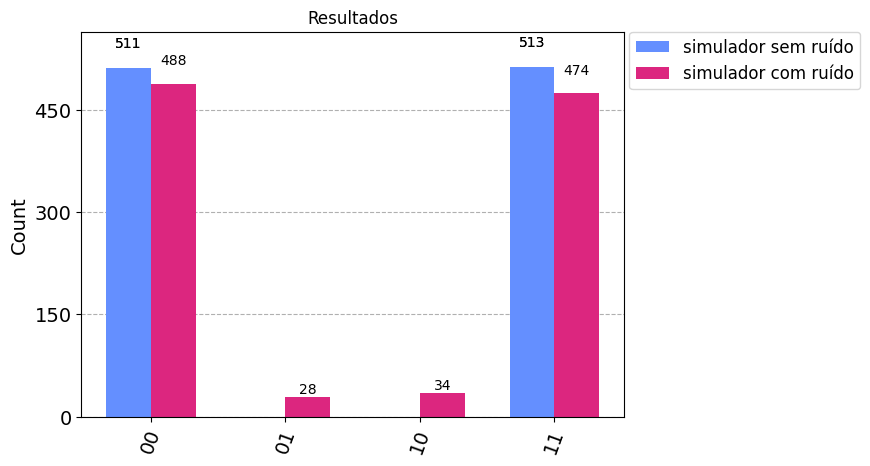

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_brisbane'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

# ==============================

legend=["simulador sem ruído", "simulador com ruído"]
display(plot_histogram([counts_simulator, counts_simulator_noisy], title="Resultados", legend=legend))

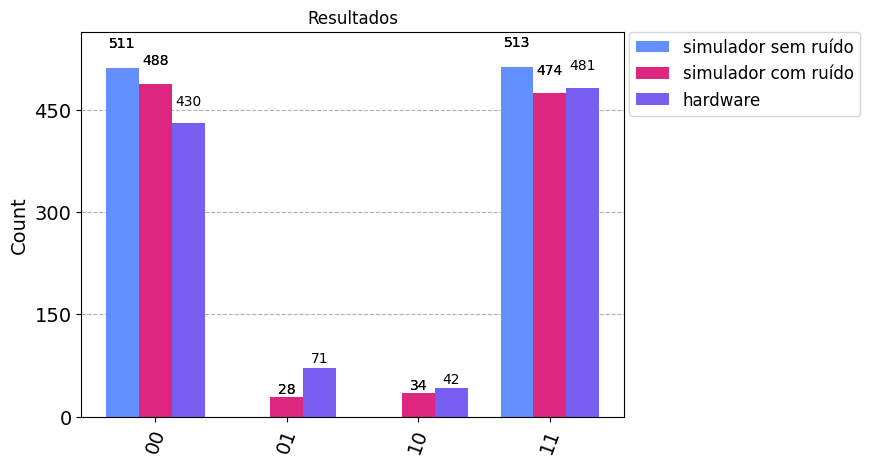

In [63]:
legend=["simulador sem ruído", "simulador com ruído", "hardware"]

plot_histogram([counts_simulator, counts_simulator_noisy, counts_hardware], title="Resultados", legend=legend)


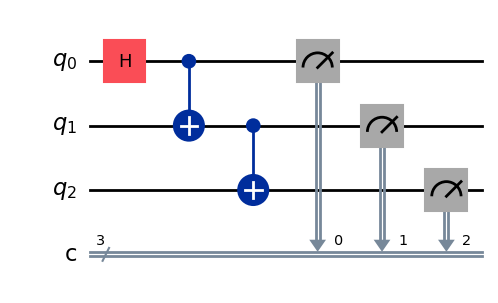

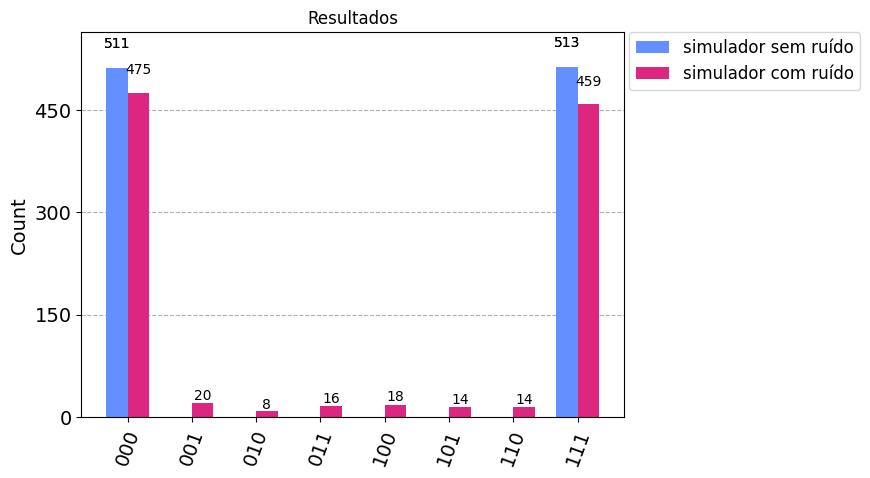

In [65]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure(range(3), range(3))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_brisbane'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

# ==============================

legend=["simulador sem ruído", "simulador com ruído"]
display(plot_histogram([counts_simulator, counts_simulator_noisy], title="Resultados", legend=legend))

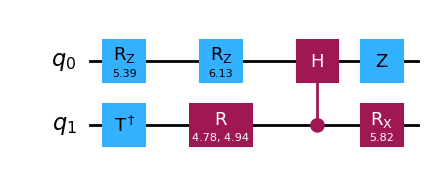

In [71]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 4, seed=42)
display(circuit.draw("mpl", style="iqp"))

In [72]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")

print(f"Observable: {observable.paulis}")

Observable: ['XZ']


In [73]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options

# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

options = Options()
options.simulator.seed_simulator = 42
options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)
    
    # <psi|XZ|psi> 
    estimator_job = estimator.run(circuit, observable)
    
    print(estimator_job.status())
    
print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')


JobStatus.RUNNING

<XZ> = 0.7


In [77]:
#serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_brisbane')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)
 
options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)
    
    # <psi|XZ|psi> 
    estimator_job = estimator.run(circuit, observable)
    
    print(estimator_job.status())
    
print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<XZ> = 0.608


In [80]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_brisbane')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)
 
options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

# usando supressão e mitigação de ruídos!!
options.execution.shots = 1000
options.optimization_level = 3
options.resilience_level = 2

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    # <psi|XZ|psi> 
    estimator_job = estimator.run(circuit, observable)

    print(estimator_job.status())

print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<XZ> = 0.6293333333333333


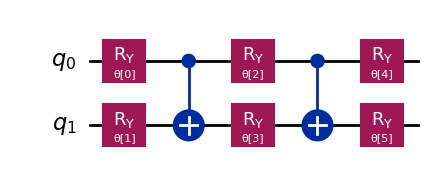

Observable: SparsePauliOp(['II', 'IZ', 'XI'],
              coeffs=[1.+0.j, 2.+0.j, 3.+0.j])


In [81]:
from qiskit.circuit.library import RealAmplitudes

psi = RealAmplitudes(num_qubits=2, reps=2)

display(psi.decompose().draw("mpl", style="iqp"))
 
H = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])

print(f"Observable: {H}")

In [82]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

options = Options()
options.simulator.seed_simulator = 42
options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)
    
    theta = [0, 1, 1, 2, 3, 5]
    
    # <psi(theta)|H|psi(theta)> 
    estimator_job = estimator.run(psi, H, parameter_values=theta)
    
    print(estimator_job.status())
    
H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')



JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.59


In [83]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_brisbane')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)
 
options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)
    
    theta = [0, 1, 1, 2, 3, 5]
    
    # <psi(theta)|H|psi(theta)> 
    estimator_job = estimator.run(psi, H, parameter_values=theta)
    
    print(estimator_job.status())
    
H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.562


In [85]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_brisbane')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)
 
options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

# usando supressão e mitigação de ruídos!!
options.execution.shots = 1000
options.optimization_level = 3
options.resilience_level = 2

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)
    
    theta = [0, 1, 1, 2, 3, 5]
    
    # <psi(theta)|H|psi(theta)> 
    estimator_job = estimator.run(psi, H, parameter_values=theta)
    
    print(estimator_job.status())
    
H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')


JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.6023333333333336


In [86]:
from docplex.mp.model import Model

from qiskit_algorithms import NumPyMinimumEigensolver

from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp

import numpy as np

import rustworkx as rx
from rustworkx.visualization import mpl_draw

# ============================================

scores_array = np.array([5, 4, 7, 2])
weights_array = np.array([7, 2, 1, 9])
max_capacity = 15

model_knapsack = Model(name="knapsack")

variables_knapsack = np.array([model_knapsack.binary_var(name=f"x_{i}") for i in range(scores_array.shape[0])])

model_knapsack.minimize(-scores_array.T@variables_knapsack)
model_knapsack.add_constraint(weights_array.T@variables_knapsack <= max_capacity)

print(model_knapsack.prettyprint())

# ============================================
print(f"\n{'='*80}\n")

converter = QuadraticProgramToQubo()
solver = NumPyMinimumEigensolver()

quad_knapsack = from_docplex_mp(model=model_knapsack)
qubo_knapsack = converter.convert(quad_knapsack)
print(qubo_knapsack.prettyprint())

# ============================================
print(f"\n{'='*80}\n")

print(qubo_knapsack.to_ising())

# ============================================
print(f"\n{'='*80}\n")

result_knapsack = solver.compute_minimum_eigenvalue(qubo_knapsack.to_ising()[0])

print(f"Valor ótimo: {result_knapsack.eigenvalue + qubo_knapsack.to_ising()[1]}")

answer_knapsack = np.array([int(char) for char in list(result_knapsack.eigenstate.to_dict().keys())[0][::-1]])
print(f"\nResposta ótima:\n{answer_knapsack}")

// This file has been generated by DOcplex
// model name is: knapsack
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;

minimize
 - 5 x_0 - 4 x_1 - 7 x_2 - 2 x_3;
 
subject to {
 7 x_0 + 2 x_1 + x_2 + 9 x_3 <= 15;

}
None


Problem name: knapsack

Minimize
  19*c0@int_slack@0^2 + 76*c0@int_slack@0*c0@int_slack@1
  + 152*c0@int_slack@0*c0@int_slack@2 + 304*c0@int_slack@0*c0@int_slack@3
  + 76*c0@int_slack@1^2 + 304*c0@int_slack@1*c0@int_slack@2
  + 608*c0@int_slack@1*c0@int_slack@3 + 304*c0@int_slack@2^2
  + 1216*c0@int_slack@2*c0@int_slack@3 + 1216*c0@int_slack@3^2
  + 266*x_0*c0@int_slack@0 + 532*x_0*c0@int_slack@1 + 1064*x_0*c0@int_slack@2
  + 2128*x_0*c0@int_slack@3 + 931*x_0^2 + 532*x_0*x_1 + 266*x_0*x_2
  + 2394*x_0*x_3 + 76*x_1*c0@int_slack@0 + 152*x_1*c0@int_slack@1
  + 304*x_1*c0@int_slack@2 + 608*x_1*c0@int_slack@3 + 76*x_1^2 + 76*x_1*x_2
  + 684*x_1*x_3 + 38*x_2*c0@int_slack@0 + 76*x_2*c0@int_slack@1
  + 152*x_2*c0@int_slack@2 + 304*x_2*c0@in